# Machine Learning with Python

[Based on this Cognitive Class Course](https://cognitiveclass.ai/courses/machine-learning-with-python/)

## Labs

The Labs for the course are located in the `Labs` folder are from CognitiveClass and are licensed under MIT

## Intro to ML

Machine learning is a field of computer science that gives computers the ability to learn without being explicitly progammed

Some popular techniques are:

- *Regression* for predicting continuous values
- *Classification* for predicting a class/category
- *Clustering* for finding structure of data and summarization
- *Associations* for finding items/events that co-occur
- *Anomaly detection* is used for finding abnormal/unusual cases
- *Sequence mining* is for predicting next values
- *Dimension reduction* for reducing the size of data
- *Recommendation systems*

We have a few different buzzwords

- AI
    - Computer Vision
    - Language processing
    - Creativity
- Machine learning
    - Field of AI
    - Experience based
    - Classification
    - Clustering
    - Neural Networks
- Deep Learning
    - Specialized case of ML
    - More automation than most ML

### Python for Machine Learning

Python has many different libraries for machine learning such as

- NumPy
- SciPy
- Matplotlib
- Pandas
- Scikit Learn
 
### Supervised vs Unsupervised

Supervised learning involves us supervising a machine learning model. We do this by teaching the model with a labelled dataset

There are two types of supervised learning, namely Classification and Regression

Unsupervised learning is when the model works on its own to discover information about data using techniques such as Dimension Reduction, Density Estimation, Market Basket Analysis, and Clustering


- Supervised
    - Classification
    - Regression
    - More evaluation methods
    - Controlled environment
- Unsupervised
     - Clustering
     - Fewer evaluation methods
     - Less controlled environment
 

## Regression

Regression makes use of two different variables

- Dependent - Predictors $X$
- Independent - Target $Y$

With Regression our $X$ values need to be continuous, but the $Y$ values can be either continuous, discrete, or categorical

There are two types of regression:

- Simple Regression
    - Simple Linear Regression
    - Simple Non-Linear Regression
    - Single $X$
- Multiple Regression
    - Multiple Linear Regression
    - Multiple Non-Linear Regression
    - Multiple $X$

Regression is used when we have continuous data and is well suited to predicting  continuous data

There are many regression algorithms such as

- Ordinal regression
- Poisson regression
- Fast forest quartile regression
- Linear, polynomial, lasso, stepwise, and ridge regression
- Bayesian linear regression
- Neural network regression
- Decision forest regression
- Boosted decision tree regression
- K nearest neighbors (KNN)

Each of which are better suited to some circumstances than to others

### Simple Linear Regression

In SLR we have two variables, one dependent, and one independent. The target variable ($y$) can be either be continuous or categorical, but the predictor ($x$) must be continuous

To get a better idea of whether SLR is appropriate we can simply do a plot of $x$ vs $y$ and find the line which will be the best fit for the data

The line is represented by the following equation

$$
y=\theta_0+\theta_1x_1
$$

The aim of SLE is to adjust the $\theta$ values to minimize the residual error in our data and find the best fit

$$
MSE=\frac{1}{n}\Sigma_{i=1}^n(y_i-\hat y_i)^2
$$

#### Estimating Parameters

We have two options to estimate our parameters, given an SLR problem

Estimate $\theta_0$ and $\theta_1$ using the following equations

$$
\theta_1 = \frac{\Sigma_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\Sigma_{i=1}^n(x_i-\bar x)^2}
$$

$$
\theta_0=\bar y-\theta_1\bar x
$$

We can use these values to make predictions with the equation

$$
\hat y=\theta_0+\theta_1x_1
$$

#### Pros

- Fast
- Easy to Understand
- No tuning needed

#### Lab
##### Import Necessary Libraries

In [1]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

##### Import Data

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


##### Data Exploration

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


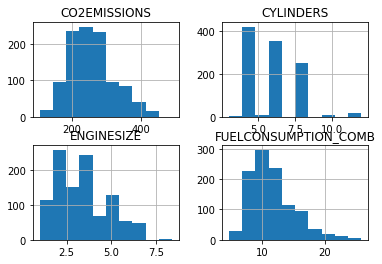

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

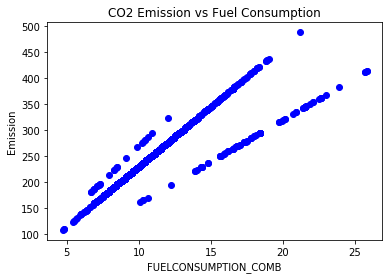

In [6]:
plt.title('CO2 Emission vs Fuel Consumption')
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

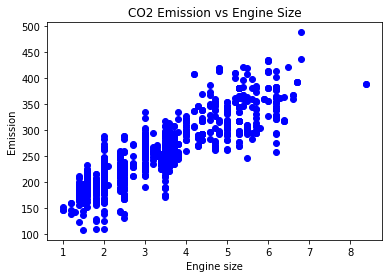

In [7]:
plt.title('CO2 Emission vs Engine Size')
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

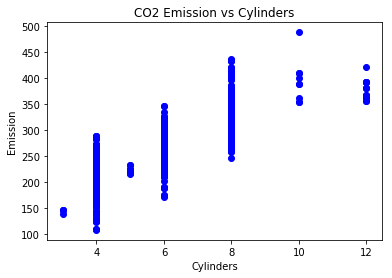

In [8]:
plt.title('CO2 Emission vs Cylinders')
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

##### Test-Train Split

We need to split our data into a test set and a train set

In [9]:
tt_mask = np.random.rand(len(df)) < 0.8
train = cdf[tt_mask].reset_index()
test = cdf[~tt_mask].reset_index()

##### Simple Regression Model

We can look at the distribution of the Engine Size in our training and test set respectively as follows

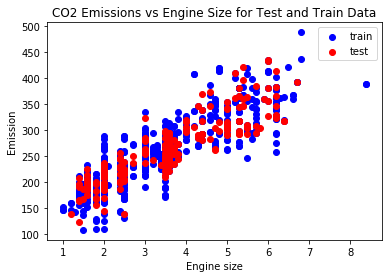

In [10]:
plt.title('CO2 Emissions vs Engine Size for Test and Train Data')
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue',label='train')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,color='red',label='test')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()
plt.show()

##### Modeling

In [11]:
from sklearn import linear_model

In [12]:
lin_reg = linear_model.LinearRegression()
train_x = train[['ENGINESIZE']]
train_y = train[['CO2EMISSIONS']]

test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]

In [13]:
lin_reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
'Coefficients: ' + str(lin_reg.coef_) + ' Intercept: ' + str(lin_reg.intercept_)

'Coefficients: [[ 39.30964622]] Intercept: [ 124.8710344]'

We can plot the line on our data to see the fit

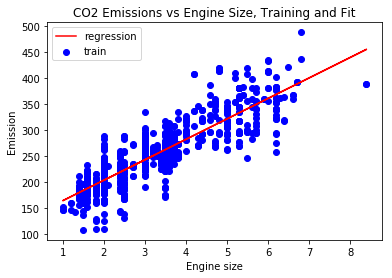

In [15]:
plt.title('CO2 Emissions vs Engine Size, Training and Fit')
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue',label='train')
plt.plot(train_x, lin_reg.coef_[0,0]*train_x + lin_reg.intercept_[0],color='red',label='regression')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()
plt.show()

##### Model Evaluation

###### Import Packages

In [16]:
from sklearn.metrics import r2_score

###### Predict the CO2 Emissions

In [17]:
predicted_y = lin_reg.predict(test_x)

###### Display Results

In [18]:
results = pd.DataFrame()

results[['ENGINESIZE']] = test_x
results[['ACTUALCO2']] = test_y
results[['PREDICTEDCO2']] = pd.DataFrame(predicted_y)
results[['ERROR']] = pd.DataFrame(np.abs(predicted_y - test_y))
results[['SQUAREDERROR']] = pd.DataFrame((predicted_y - test_y)**2)

results.head()

,ENGINESIZE,ACTUALCO2,PREDICTEDCO2,ERROR,SQUAREDERROR
0,5.9,359,356.797947,2.202053,4.849037
1,2.0,230,203.490327,26.509673,702.762771
2,2.0,230,203.490327,26.509673,702.762771
3,2.0,214,203.490327,10.509673,110.453230
4,5.2,409,329.281195,79.718805,6355.087912


###### Model Evaluation

In [19]:
MAE = np.mean(results[['ERROR']])
MSE = np.mean(results[['SQUAREDERROR']])
R2  = r2_score(test_y, predicted_y)

print("Mean absolute error: %.2f" % MAE)
print("Residual sum of squares (MSE): %.2f" % MSE)
print("R2-score: %.2f" % R2)

Mean absolute error: 22.83
Residual sum of squares (MSE): 826.28
R2-score: 0.78


### Multiple Linear Regression

In reality multiple independent variables will define a specific target. MLR is simply an extension on the SLR Model

MLR is useful for solving problems such as

- Define the impact of independent variables on effectiveness of prediction
- Predicting the impact of change in a specific variable

MLR makes use of multiple predictors to predict the target value, and is generally of the form


$$
\hat y=\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + ... + \theta_nx_n
$$

$$
\hat y=\theta^TX
$$

$\theta$ is a vector of coefficients which are multiplied by $x$, these are called the parameters or weight vectors, and $x$ is the feature set, the idea with MLR is to predict the best-fit hyperplane for our data

#### Estimating Parameters

We have a few ways to estimate the best parameters, such as

- Ordinary Least Squares
    - Linear algebra
    - Not suited to large datasets
- Gradient Descent
    - Good for large datasets
- Other methods are available to do this as well

#### How Many Variables?

Making use of more variables will generally increase the accuracy of the model, howevre using too many variables without good justification can lead to us overfitting the model

We can make use of categorical variables if we convert them to numerric values

MLR assumes that we have a linear relationship between the dependent and independent variables

### Model Evaluation

We have to perform regression evaluation when building a model

#### Train/Test Joint

We make use of our data to train our model, and then compare the predicted values to the actual values of our model

The error of the model is the average of the actual and predicted values for the model

This approach has a high training accuracy, but a lower out-of-sample accuracy

Aiming for a very high training accuracy can lead to overfitting to the training data resulting in poor out-of-sample data

#### Train/Test Split

We split our data into a portion for testing and a portion for training, these two sets are mutually exclusive and allow us to get a good idea of what our out-of-sample accuracy will be

Generally we would train our data with the testing data afterwards in order to increase our accuracy

##### K-Fold Cross-Validation

This makes use of us splitting the dataset into different pieces, and using every combination of test/train datasets in order to get a more aggregated fit

#### Evaluation Metrics

Evaluation metrics are used to evaluate the performance of a model, metrics provide insight into areas of the model that require attention

##### Errors

In the context of regression, error is the difference between the data points and the valuedetermined by the model

Some of the main error equations are defined below


$$
MAE=\frac{1}{n}\Sigma_{i=1}^n|y_i-\hat y_i|
$$


$$
MSE=\frac{1}{n}\Sigma_{i=1}^n(y_i-\hat y_i)^2
$$


$$
RMSE=\sqrt{\frac{1}{n}\Sigma_{i=1}^n(y_i-\hat y_i)^2}
$$

$$
RAE=\frac{\Sigma_{i=1}^n|y_i-\hat y_i|}{\Sigma_{i=1}^n|y_i-\bar y_i|}
$$

$$
RSE=\frac{\Sigma_{i=1}^n(y_i-\hat y_i)^2}{\Sigma_{i=1}^n(y_i-\bar y_i)^2}
$$

##### Fit

$R^2$ helps us see how closely our data is represented by a specific regression line, and is defined as

$$
R^2=1-RSE
$$

Or

$$
R^2=1-\frac{\Sigma_{i=1}^n(y_i-\hat y_i)^2}{\Sigma_{i=1}^n(y_i-\bar y_i)^2}
$$

A higher $R^2$ represents a better fit

### Non-Linear Regression

Not all data can be predicted using a linear regression line, we have many diferent regression lines to fit more complex data

#### Polynomial Regression

Polynomial Regression is a method with which we can fit a polynomial to our data, it is still possible for us to define a polynomial regression by transforming it into a multi-variable linear regression problem as follows

Given the polynomial

$$
\hat y=\theta_0+\theta_1x+\theta_2x^2+\theta_3x^3
$$

We can create new variables which represent the different powers of our initial variable

$$
x_1=x
$$

$$
x_2=x^2
$$

$$
x_3=x^3
$$

Therefore resulting in the following linear equation

$$
\hat y=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3
$$

#### Other Non-Linear Regression

Non-Linear Regression can be of many forms as well, including any other mathematical relationships that we can define

For more complex NLR problems it can be difficult to evaluate the parameters for the equation

#### Lab

There are many different model types and equations shown in the Lab Notebook aside from what I have here

##### Import the Data

Using China's GDP data

In [20]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [21]:
x_data, y_data = (df[['Year']], df[['Value']])

##### Plotting the Data

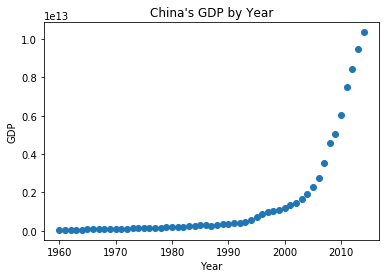

In [22]:
plt.title('China\'s GDP by Year')
plt.plot(x_data, y_data, 'o')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

##### Defining a Fit

Next we can try to approximate a curve that we think will fit the data we have, we can use a sigmoid, as defined below

$$
\hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}
$$

$\beta_1$ : Controls the curve's steepness,

$\beta_2$ : Slides the curve on the x-axis.

In [23]:
def sigmoid(x, b_1, b_2):
     y = 1 / (1 + np.exp(-b_1*(x-b_2)))
     return y

The above function can be seen to be

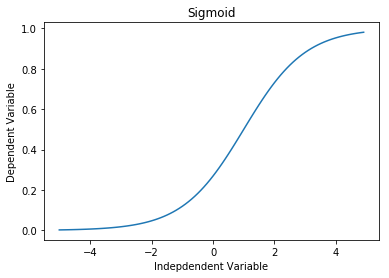

In [24]:
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X, 1, 1)

plt.title('Sigmoid')
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Next let's try to fit this to the data with some example values

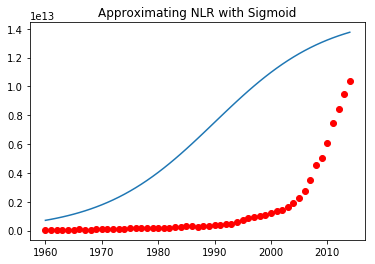

In [25]:
b_1 = 0.10
b_2 = 1990.0

#logistic function
y_pred = sigmoid(x_data, b_1 , b_2)

#plot initial prediction against datapoints
plt.title('Approximating NLR with Sigmoid')
plt.plot(x_data, y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')
plt.show()

##### Data Normalization

Let's normalize our data so that we don't need to multiply by crazy numbers as before

In [26]:
# for some reason this seems to be the only way the conversion
# from a dataframe works as desired
# the normalization from the labs are as such:
# xdata =x_data/max(x_data)
# ydata =y_data/max(y_data)
x_norm = (np.array(x_data)/max(np.array(x_data))).transpose()[0]
y_norm = (np.array(y_data)/max(np.array(y_data))).transpose()[0]

##### Finding the Best Fit

Next we can import `curve_fit` to help us fit the the curve to our data

In [27]:
from scipy.optimize import curve_fit

In [28]:
popt, pcov = curve_fit(sigmoid, x_norm, y_norm)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
print(popt)
print(pcov)

 beta_1 = 690.453017, beta_2 = 0.997207
[ 690.45301712    0.99720713]
[[  1.52273887e+03  -2.88115957e-04]
 [ -2.88115957e-04   7.25956452e-09]]


And we can plot the result as follows

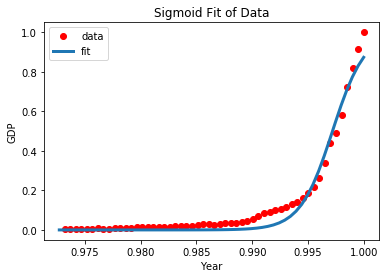

In [29]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x, *popt)

plt.title('Sigmoid Fit of Data')
plt.plot(x_norm, y_norm, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend()
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

##### Model Accuracy

In [30]:
from sklearn.metrics import r2_score

# split data into train/test
mask = np.random.rand(len(df)) < 0.8
train_x = x_norm[mask]
test_x = x_norm[~mask]
train_y = y_norm[mask]
test_y = y_norm[~mask]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.53


## Classification

Classification is a supervised learning approach which is a means of splitting data into discrete classes

The target atribute is a categorical value with discrete values

Classification will determine the class label for a specific test case

Binary as well as multi-class classification methods are available

### Learning Algorithms

Many learning algorithms are available for classification such as

- Decision trees
- Naive Bayes
- KNN
- Logistic Regression
- Neural Networks
- SVM

### Evaluation Metrics

We have a few different evaluation metrics for classification

#### Jaccard Index

We simply measure which fraction of our predicted values $\hat y$ intersect with the actual values $y$

$$
J(y,\hat y)=\frac{|y\cap\hat y|}{|y\cup\hat y|}=\frac{|y\cap\hat y|}{|y|+|\hat y|-|y\cap\hat y|} 
$$

#### F1 Score

This is a measure which makes use of a confusion matrix and compares the predictions vs actual values for each class

In the count of binary classification this will give us our True Positives, False Positives, True Negatives and False Negatives

We can define some metrics for each class with the following

$$ 
Precision=\frac{TP}{TP+FP}
$$

$$
Recall=\frac{TP}{TP+FN}
$$

$$
F1=2\frac{Precision\times Rcall}{Precision+Recall}
$$

F1 varies between 0 and 1, with 1 being the best

The accuracy for a classifier is the average accuracy of each of its classes

#### Log Loss

The log loss is the performance of a classifier where the predicted output is a probability between 1 and 0


$$
y\cdot log(\hat y)+(1-y)\cdot log(1-\hat y)
$$

Better classifiers have a log loss closer to zero

### K-Nearest Neighbor

KNN is a method of determining class based on the training datapoints that sit near our test datapoint based on the fact that closer datapoints are more important than those further away in predicting a specific value

#### Algorithm

1. Pick a value for K
2. Calculate distance of unknown case from known cases
3. Select k observations
4. Predict the value based on the most common observaton value

We can make use of euclidean distance to calculate the distance between our continuous values, and a voting system for discrete data

Using a low K value can lead to overfitting, and using a very high value can lead to us underfitting

In order to find the optimal K value we do multiple tests by continuously increasing our K value and measuring the accuracy for that K value

Furthermore KNN can also be used to predict continuous values (regression) by simply having a target variable and predictors that are continuous

#### Lab

##### Import Libraries

In [31]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

##### Import Data

The dataset being used is one in which demographic data is used to define a customer service group, these being as follows

| Value | Category      |
| ----- | ------------- |
| 1     | Basic Service |
| 2     | E-Service     |
| 3     | Plus Service  |
| 4     | Total Service |

In [32]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv')

In [33]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


##### Data Visualization and Analysis

We can look at the number of customers in each class

In [34]:
df.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

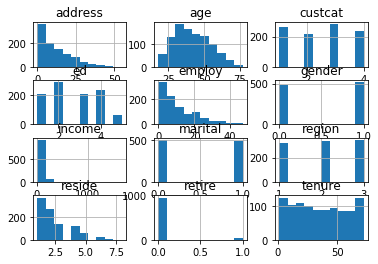

In [35]:
df.hist()
plt.show()

We can take a closer look at income with

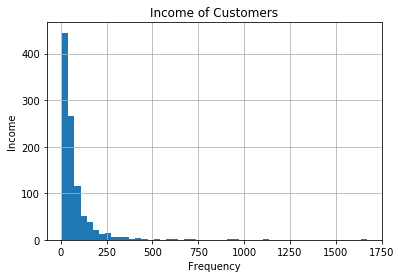

In [36]:
df.income.hist(bins=50)
plt.title('Income of Customers')
plt.xlabel('Frequency')
plt.ylabel('Income')
plt.show()

##### Features

To use `sklearn` we need to convert our data into an array as follows

In [37]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [38]:
# X = df.loc[:, 'region':'reside'].values
# Y = df.loc[:,'custcat'].values
X = df.loc[:, 'region':'reside']
Y = df.loc[:,'custcat']

In [39]:
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [40]:
Y.head()

0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64

##### Normalize Data

For alogrithms like KNN which are distance based it is useful to normalize the data to have a zero mean and unit variance, we can do this using the `sklearn.preprocessing` package

In [41]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X[0:5])

[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


##### Test/Train Split

Next we can split our model into a test and train set using `sklearn.model_selection.train_test_split()`

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
ran = 4
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=ran)

In [44]:
print('Train: ', X_train.shape, Y_train.shape)
print('Test: ', X_test.shape, Y_test.shape)

Train:  (800, 11) (800,)
Test:  (200, 11) (200,)


##### Classification

We can then make use of the KNN classifier on our data

In [45]:
from sklearn.neighbors import KNeighborsClassifier as knn_classifier

We will use an intial value of 4 for k, but will later evaluate different k values

In [46]:
k = 4

In [47]:
knn = knn_classifier(n_neighbors=k)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [48]:
Y_hat = knn.predict(X_test)
print(Y_hat[0:5])

[1 1 3 2 4]


##### Model Evaluation

In [49]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_hat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


##### Other K Values

We can do this for additional K values to look at how the accuracy is affected

In [50]:
k_max = 100
mean_acc = np.zeros((k_max))
std_acc = np.zeros((k_max))
ConfustionMx = [];
for n in range(1,k_max + 1):
    
    #Train Model and Predict  
    knn = knn_classifier(n_neighbors = n).fit(X_train,Y_train)
    Y_hat = knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, Y_hat)

    std_acc[n-1] = np.std(Y_hat == Y_test)/np.sqrt(Y_hat.shape[0])
    
print(mean_acc)

[ 0.3    0.29   0.315  0.32   0.315  0.31   0.335  0.325  0.34   0.33
  0.315  0.34   0.33   0.315  0.34   0.36   0.355  0.35   0.345  0.335
  0.35   0.36   0.37   0.365  0.365  0.365  0.35   0.36   0.38   0.385
  0.395  0.395  0.38   0.37   0.365  0.385  0.395  0.41   0.395  0.395
  0.395  0.38   0.39   0.375  0.365  0.38   0.375  0.375  0.365  0.36   0.36
  0.365  0.37   0.38   0.37   0.37   0.37   0.36   0.35   0.36   0.355
  0.36   0.36   0.36   0.34   0.34   0.345  0.35   0.35   0.355  0.365
  0.355  0.355  0.365  0.37   0.37   0.37   0.35   0.35   0.35   0.35   0.36
  0.355  0.33   0.32   0.345  0.345  0.345  0.335  0.345  0.355  0.345
  0.345  0.34   0.34   0.335  0.345  0.325  0.315  0.31 ]


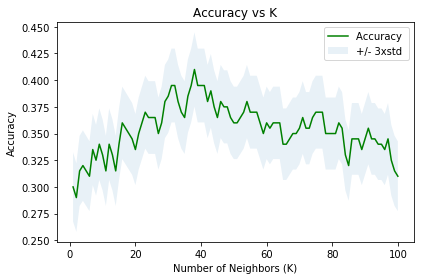

In [51]:
plt.title('Accuracy vs K')
plt.plot(range(1,k_max + 1),mean_acc,'g')
plt.fill_between(range(1,k_max + 1),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

The maximum accuracy can be found to be

In [52]:
print('Max Accuracy: {}, K={}'.format(max(mean_acc),mean_acc.argmax() + 1))

Max Accuracy: 0.41, K=38


##### Test Sample

It can be noted that the accuracy and optimal value varies based on the `random_state` parameter in the `train_test_split` function used when doing the test/train split

##### Retrain with All Data

We can retrain the model to use all the data at the determined optimal value and look at the in-sample accuracy

In [53]:
k = mean_acc.argmax()
knn = knn_classifier(n_neighbors=k)
knn.fit(X, Y)
print("In-Sample Accuracy: ", metrics.accuracy_score(Y, knn.predict(X)))

In-Sample Accuracy:  0.425


### Decision Trees

Decision Trees allow us to make use of discrete and continuous predictors to find a discrete target

Decision trees test a condition and branch off based on the result, eventually leading to a specific outcome/decision

#### Algorithm

1. Choose a dataset
2. Calculate the significance of an attribute in splitting the data
3. Split the data based on the value of the attribute
4. Go to **1**

We aim to have resulting nodes that are high in purity. A higher purity increases predictiveness/significance

Recursive partitining is used to decrease the impurity/entropy in the resulting nodes

Entropy is a measurement of randomness

If samples are equally mixed, the entropy is 1, if the samples are pure, the entropy is 1

$$
Entropy(v)=P(v)-log(P(v))
$$

The best tree is the one that results in the most information gain after the split

$$
Gain(S,A) = Entropy(S)-\Sigma_v\frac{|S_v|}{|S|}Entropy(S_v)
$$            

#### Lab

##### Import Libraries

In [54]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

##### Import Data

In [55]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv')

In [56]:
print(df.shape)
df.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


##### Split X and Y Values

In [57]:
X_headers = ['Age','Sex','BP','Cholesterol','Na_to_K']
X = df[X_headers]
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [58]:
Y = df[['Drug']]
Y.head()

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


##### Create Numeric Variables

We need to get numeric variables for X as `sklearn` does not support string categorization (according to the guy in the course anyway)

In [59]:
from sklearn import preprocessing

In [60]:
X_arr = np.array(X)

encoder = preprocessing.LabelEncoder()
encoder.fit(['F','M'])
X_arr[:,1] = encoder.transform(X_arr[:,1])

encoder.fit(['LOW','NORMAL','HIGH'])
X_arr[:,2] = encoder.transform(X_arr[:,2])

encoder.fit(['NORMAL','HIGH'])
X_arr[:,3] = encoder.transform(X_arr[:,3])

print(X_arr[0:5])

[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.113999999999999]
 [28 0 2 0 7.797999999999999]
 [61 0 1 0 18.043]]


In [61]:
X_encoded = pd.DataFrame(data=X_arr, columns=X_headers)
X_encoded.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


##### Train/Test Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size = 0.3)
print('Training: X : {}, Y : {}'.format(X_train.shape,Y_train.shape))
print('Testing: X : {}, Y : {}'.format(X_test.shape,Y_test.shape))

Training: X : (140, 5), Y : (140, 1)
Testing: X : (60, 5), Y : (60, 1)


##### Decision Tree

In [64]:
drug_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
drug_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
drug_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

##### Prediction

In [66]:
Y_predicted = drug_tree.predict(X_test)

In [67]:
print(Y_predicted[0:5])
print(Y_test[0:5])

['drugY' 'drugY' 'drugA' 'drugY' 'drugC']
      Drug
123  drugY
88   drugY
100  drugA
179  drugY
47   drugC


##### Evaluation

In [68]:
from sklearn import metrics

In [69]:
print('Decision Tree Accuracy: ', metrics.accuracy_score(Y_test, Y_predicted))

Decision Tree Accuracy:  1.0


##### Visalization

In [70]:
!pip install pydotplus
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

Requirement not upgraded as not directly required: pydotplus in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: pyparsing>=2.0.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pydotplus)


In [71]:
dot_data = StringIO()
filename = 'drug_decision_tree.png'
feature_names = X_headers
target_names = df['Drug'].unique().tolist()

In [72]:
out = tree.export_graphviz(drug_tree, 
                           feature_names=feature_names, 
                           out_file=dot_data, 
                           class_names=target_names, 
                           filled=True, 
                           special_characters=True, 
                           rotate=False)

In [73]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

True

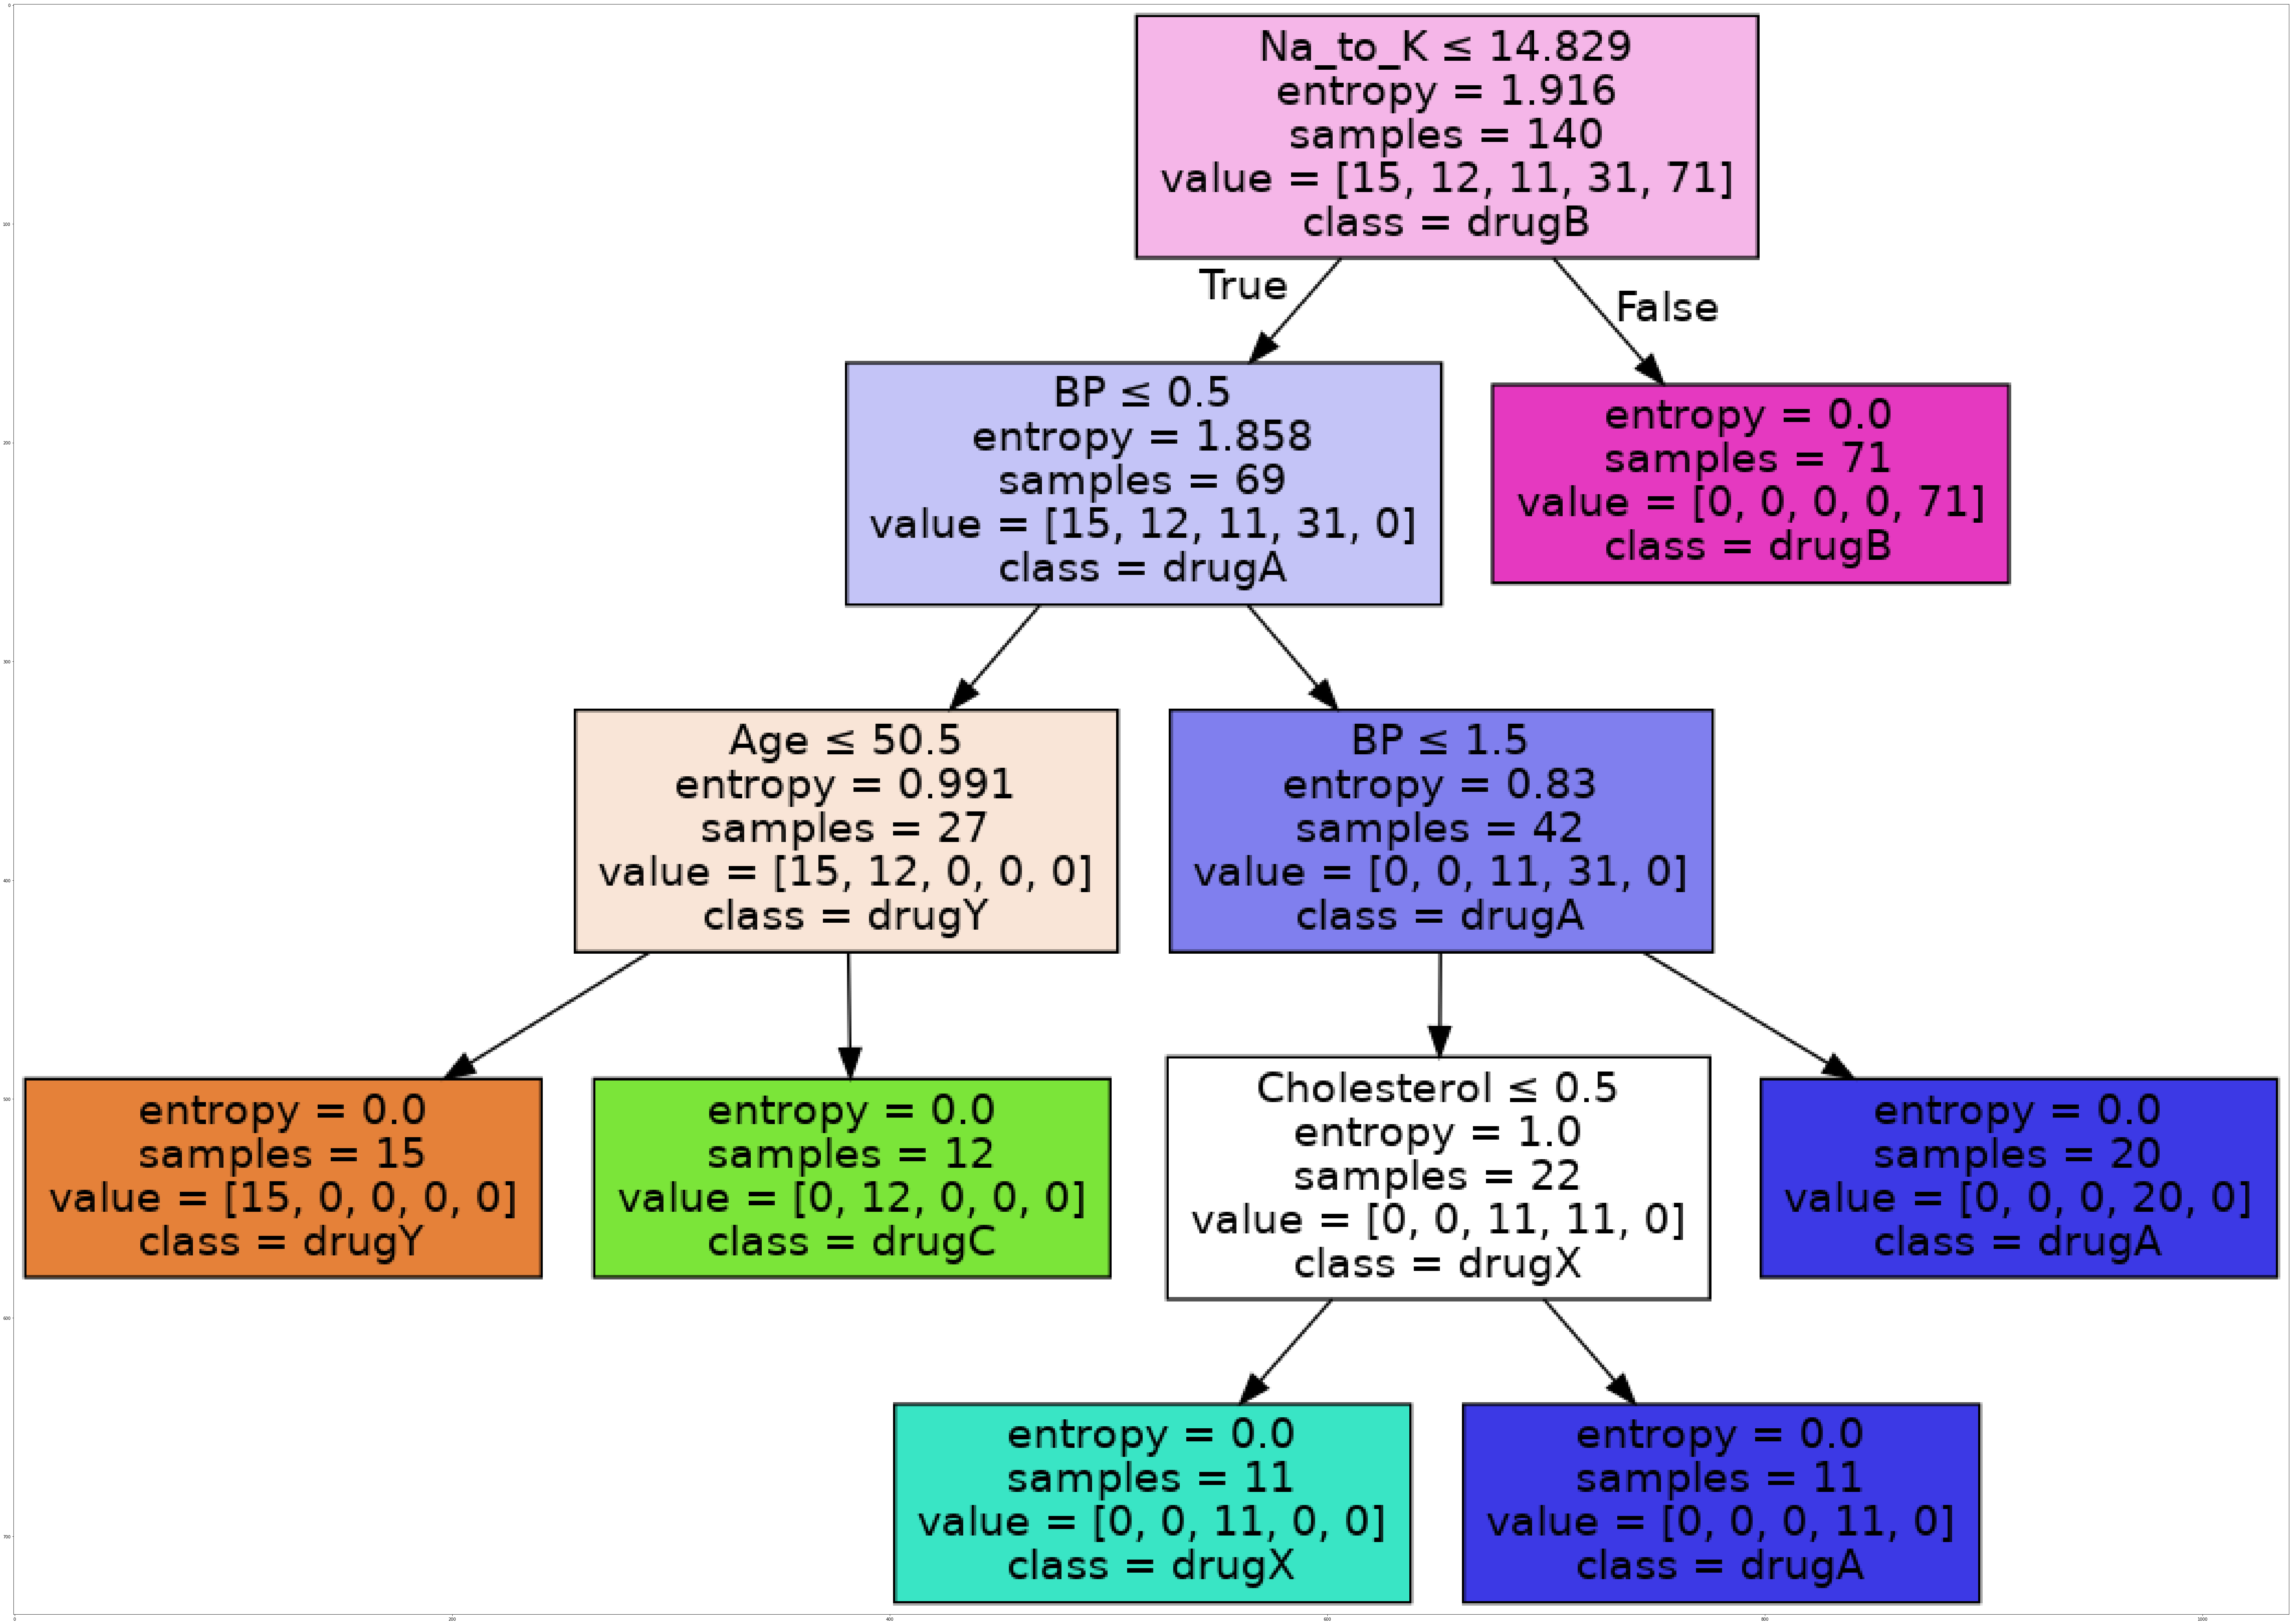

In [74]:
img = mpimg.imread(filename)
plt.figure(figsize=(100, 100))
plt.imshow(img, interpolation='nearest')
plt.show()

### Logistic Regression

Logistic regression is a categorical classification algorithm based on a linear division between categorical values


Logistic regression can be used for binary and multi class classification and predicts the probability of a class which is then mapped to a discrete value

Logistic regression is best suited to

- Binary Classification
- If you need probabilistic results
- Linear decision boundry 

$$
\theta_0+\theta_1x_1+\theta_2x_2>0
$$

- If you need to understand the impact of a feature

A logistic regression can calculate

$$
\hat y=P(y=1|x)
$$

### Logistic vs Linear Regression

We can use linear regression with a dividing line to give whether or not a specific circumstance will lead to a specific output, where we define a threshold value which would define a boundry for the target class

The problem with this method is that we only have a specific binary outcome, and not any information as to what the probability of that outcome is. Logistic regression helps us to define this by making use of a sigmoid to smoothen out the classification boundry, the sigmoid function can be seen below

$$
\sigma(\theta^TX)=\frac{1}{1+e^{-\theta^Tx}}
$$

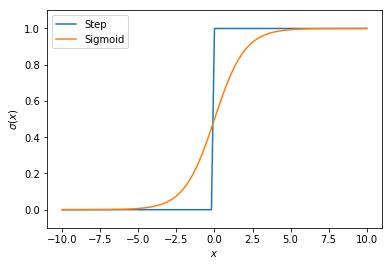

In [75]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt

x = np.array(range(-100,102,2))/10
sigmoid = 1/(1+np.exp(-1*x))
step = []
for i in range(len(x)):
    step.append(1 if x[i] >= 0 else 0)

plt.plot(x,step, label='Step' )
plt.plot(x,sigmoid, label='Sigmoid')
# plt.xlim(-10,10)
plt.ylim(-0.1,1.1)
plt.xlabel('$x$')
plt.ylabel('$\sigma(x)$')
plt.legend()
plt.show()

Based on the above we can see that depending on the value of $x$ we will have a greater tendency of a value towards 0 or 1 but not explicitly either

#### Algorithm

1. Initialize $\theta$
2. Calculate $\hat y=\sigma(\theta^TX)$ for an $X$
3. Compare $Y$ and $\hat Y$ and record the error, defined by a cost function $J(\theta)$
4. Change $\theta$ to reduce the cost
5. Go to **2**

We can use different ways to change $\theta$ such as gradient descent

#### Lab

##### Import Libraries

In [76]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt

##### Import Data

In [77]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv')

In [78]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


##### Preprocessing

In [79]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df[['churn']] = df[['churn']].astype('int')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


##### Define X and Y

In [80]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[  11.,   33.,    7.,  136.,    5.,    5.,    0.],
       [  33.,   33.,   12.,   33.,    2.,    0.,    0.],
       [  23.,   30.,    9.,   30.,    1.,    2.,    0.],
       [  38.,   35.,    5.,   76.,    2.,   10.,    1.],
       [   7.,   35.,   14.,   80.,    2.,   15.,    0.]])

In [81]:
Y = np.asarray(df['churn'])
Y[0:5]

array([1, 1, 0, 0, 0])

##### Normalize Data

In [82]:
from sklearn import preprocessing

In [83]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

##### Train/Test Split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [86]:
print('Train: ', X_train.shape, Y_train.shape)
print('Test: ', X_test.shape, Y_test.shape)

Train:  (160, 7) (160,)
Test:  (40, 7) (40,)


##### Modelling

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [88]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, Y_train)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Predict

In [89]:
Y_hat = lr.predict(X_test)

In [90]:
Y_hat_prob = lr.predict_proba(X_test)
Y_hat_prob[0:5]

array([[ 0.54132919,  0.45867081],
       [ 0.60593357,  0.39406643],
       [ 0.56277713,  0.43722287],
       [ 0.63432489,  0.36567511],
       [ 0.56431839,  0.43568161]])

##### Evaluation

###### Jaccard Index

In [91]:
from sklearn.metrics import jaccard_similarity_score

In [92]:
jaccard_similarity_score(Y_test, Y_hat)

0.75

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [94]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [95]:
print(confusion_matrix(Y_test, Y_hat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


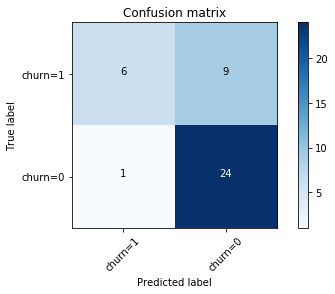

In [96]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [97]:
print(classification_report(Y_test, Y_hat))

             precision    recall  f1-score   support

          0       0.73      0.96      0.83        25
          1       0.86      0.40      0.55        15

avg / total       0.78      0.75      0.72        40



In [98]:
from sklearn.metrics import log_loss

In [99]:
log_loss(Y_hat, Y_hat_prob)

0.54903192026736869

##### Using Different Model Parameters

In [100]:
lr2 = LogisticRegression(C=10, solver='sag').fit(X_train,Y_train)
Y_hat_prob2 = lr2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(Y_test, Y_hat_prob2))

LogLoss: : 0.63


### Support Vector Machine

SVM is a supervised algorithm that classifies data by finding a separator

1. Map data to higher-dimensional Feature Space
2. Find a separating hyperplane in higher dimensional space

#### Data Transformation

Mapping data into a higher space is known as kernelling and can be of different functions such as

- Linear
- Polynomial
- RBF
- Sigmoid

The best hyperplane is the one that results in the largest margin possible between the hyperplane and our closest sample, the samples closest to our hyperlane are known as support vectors

#### Advantages and Disadvantages

- Advantages
    - Accurate in high dimensional spaces
    - Memory efficient
- Disadvantages
    - Prone to overfitting
    - No probability estimation
    - Not suited to very large datasets
    
#### Applications

- Image Recognition
- Text mining/categorization
    - Spam detection
    - Sentiment analysis
- Regression
- Outlier detection
- Clustering

#### Lab

##### Import Packages

In [101]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

##### Import Data

The data is from the UCI Machine Learning Archive, the fields are as follows

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

In [102]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv')

In [103]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


##### Visualization

The `Class` field contains the diagnosis where 2 means benign, and 4 means malignant

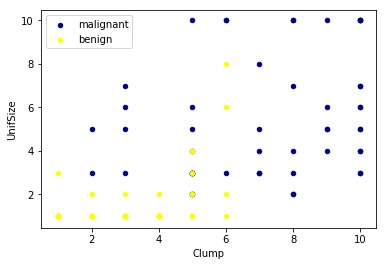

In [104]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', 
                                     x='Clump', 
                                     y='UnifSize', 
                                     color='DarkBlue', 
                                     label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', 
                                x='Clump', 
                                y='UnifSize', 
                                color='Yellow', 
                                label='benign', 
                                ax=ax);
plt.show()

##### Preprocessing Data

In [105]:
print(df.dtypes)

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object


In [106]:
df = df[pd.to_numeric(df['BareNuc'].apply(lambda x: x.isnumeric()))]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

##### Break into X and Y

In [107]:
X = np.asarray(df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [108]:
Y = np.asarray(df['Class'])
Y[0:5]

array([2, 2, 2, 2, 2])

##### Train/Test Split

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


##### Modeling

In [110]:
from sklearn import svm

In [111]:
clf = svm.SVC(gamma='auto', kernel='rbf')
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
Y_hat = clf.predict(X_test)
Y_hat[0:5]

array([2, 4, 2, 4, 2])

##### Evaluation

In [113]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [114]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          2       1.00      0.94      0.97        90
          4       0.90      1.00      0.95        47

avg / total       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


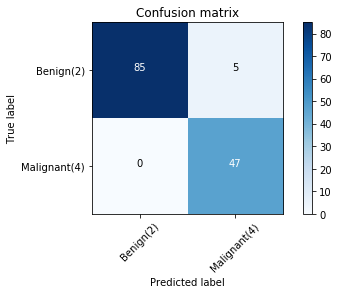

In [115]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_hat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(Y_test, Y_hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],
                      normalize= False,  title='Confusion matrix')

In [116]:
from sklearn.metrics import f1_score
print('F1 Score: ', f1_score(Y_test, Y_hat, average='weighted'))

F1 Score:  0.96390389821


In [117]:
from sklearn.metrics import jaccard_similarity_score
print('Jaccard Index: ', jaccard_similarity_score(Y_test, Y_hat))

Jaccard Index:  0.963503649635


##### Using an Alternative Kernal

In [118]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, Y_train) 
Y_hat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(Y_test, Y_hat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(Y_test, Y_hat2))

Avg F1-score: 0.9639
Jaccard score: 0.9635


## Clustering

Clustering is an unsupervised grouping of data in which similar datapoints are grouped together

The diference between clustering and classification is that clustering does not speficy what th groupings should be

### Uses of Clustering

- Exploration of data
- Summary Generation
- Outlier Detection
- Finding Duplicates
- Data Pre-Processing

### Clustering Algorithms

- Partitioned Based
    - Efficient
- Hierachical 
    - Produces trees of clusters
- Density based
    - Produces arbitrary shaped clusters
    

### K-Means

- Partitioning Clustering
- Divides data into K non-overlapping subsets

K tries to minimize intra-cluster distances, and maximize inter-cluster distances

#### Distance

We can define the distance simply as the euclidean distance, typically normalizing the values so that our distances are not affected more by one value than another

Other distance formulas can be used depending on our understanding of the data as appropriate

#### Algorithm

1. Determine K and initialize centroids randomly
2. Measure distance from centroids to each datapoint
3. Assign each point to closest centroid
4. New centroids are at the mean of the points in its cluster 
5. Go to **2** if not converged

K-Means may not converge to a global optimum, but simply a local one and is somewhat dependant on the intial choice in **1**

#### Accuracy

Average distance between datapoints within a cluster is a measure of error

#### Choice of K

We can use the elbow method in which we look at the distance of the datapoints to their centroid  versus the K value, and select the one at which we notice a sharp change in the distance gradient

#### Lab

##### Import Packages

In [119]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
# from sklearn.datasets.samples_generator import make_blobs 

##### Import Data

In [120]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv')

In [121]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [122]:
df = df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


##### Normalize the Data

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
X = np.asarray(df.values[:,1:])
X = np.nan_to_num(X)
X

array([[ 41.  ,   2.  ,   6.  , ...,   1.07,   0.  ,   6.3 ],
       [ 47.  ,   1.  ,  26.  , ...,   8.22,   0.  ,  12.8 ],
       [ 33.  ,   2.  ,  10.  , ...,   5.8 ,   1.  ,  20.9 ],
       ..., 
       [ 25.  ,   4.  ,   0.  , ...,   3.21,   1.  ,  33.4 ],
       [ 32.  ,   1.  ,  12.  , ...,   0.7 ,   0.  ,   2.9 ],
       [ 52.  ,   1.  ,  16.  , ...,   3.64,   0.  ,   8.6 ]])

In [125]:
X_norm = StandardScaler().fit_transform(X)
X_norm

array([[ 0.74,  0.31, -0.38, ..., -0.59, -0.52, -0.58],
       [ 1.49, -0.77,  2.57, ...,  1.51, -0.52,  0.39],
       [-0.25,  0.31,  0.21, ...,  0.8 ,  1.91,  1.6 ],
       ..., 
       [-1.25,  2.47, -1.26, ...,  0.04,  1.91,  3.46],
       [-0.38, -0.77,  0.51, ..., -0.7 , -0.52, -1.08],
       [ 2.11, -0.77,  1.1 , ...,  0.16, -0.52, -0.23]])

### Modeling

In [126]:
k = 3
k_means = KMeans(init='k-means++',
                n_clusters=k,
                n_init=12)

In [127]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [128]:
labels = k_means.labels_
print(labels[:20], labels.shape)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1] (850,)


In [129]:
df['Cluster'] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [130]:
df.groupby('Cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


##### Visualization

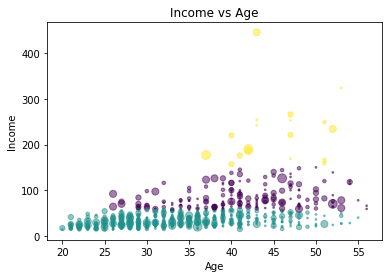

In [131]:
%matplotlib inline
area = np.pi*(X[:,1])**2
plt.figure()
plt.title('Income vs Age')
plt.scatter(X[:,0], X[:,3], s=area, c=labels, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [132]:
from mpl_toolkits.mplot3d import Axes3D

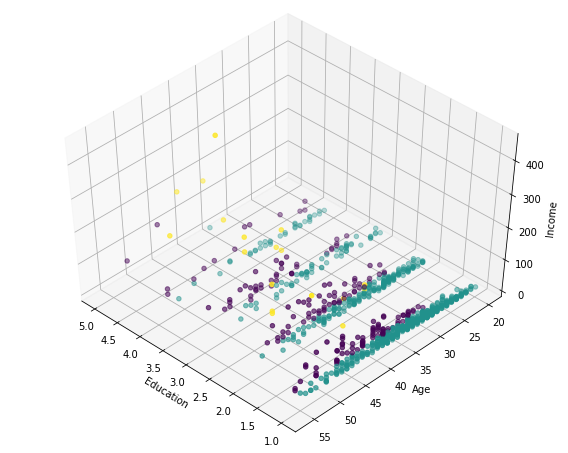

In [133]:
plt.clf()
ax = Axes3D(plt.figure(figsize=(8,6)), rect=[0,0,0.95,1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:,1], X[:,0], X[:,3], c=labels)

plt.figure()
plt.show()

### Hierachical Clustering

Two types

- Divisive - Top Down
- Agglomerative - Bottom Up

Agglomerative works by combining clusters based on the distance between them, this is the most popular method for HC

#### Agglomerative Algorithm

1. Create n clusters, one for each datapoint
2. Compute the proximity matrix
3. Repeat Until a single cluster remains
    1. Merge the two closest clusters
    2. Update the proximity matrix

We can use any distance function we want to, there are multiple algorithms for this

- Single linkage clustering
- Complete linkage clustering
- Average linkag clustering
- Centroid linkage clustering

#### Advantages and Disadvantages

- Advantages
    - Number of clusters does not need to be specified
    - Easy to implement
    - Dendogram can be easily understood
- Disadvantages
    - Long runtimes
    - Cannot undo previous steps
    - Difficult to identify the number of clusters on dendogram

#### Lab

##### Import Packages

In [134]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs

##### Import Data

In [135]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv')

In [136]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


##### Clean Data

In [137]:
print ("Shape of dataset before cleaning: ", df.size)

df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)

print ("Shape of dataset after cleaning: ", df.size)
df.head()

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


##### Selecting Features

In [138]:
X = df[['engine_s','horsepow', 'wheelbas', 
        'width', 'length', 'curb_wgt', 
        'fuel_cap', 'mpg']].values
print(X[:5])

[[   1.8   140.    101.2    67.3   172.4     2.64   13.2    28.  ]
 [   3.2   225.    108.1    70.3   192.9     3.52   17.2    25.  ]
 [   3.5   210.    114.6    71.4   196.6     3.85   18.     22.  ]
 [   1.8   150.    102.6    68.2   178.      3.     16.4    27.  ]
 [   2.8   200.    108.7    76.1   192.      3.56   18.5    22.  ]]


##### Normalization

In [139]:
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
print(X_norm[:5])

[[ 0.11  0.22  0.19  0.28  0.31  0.23  0.13  0.43]
 [ 0.31  0.43  0.34  0.46  0.58  0.5   0.32  0.33]
 [ 0.36  0.39  0.48  0.53  0.63  0.61  0.35  0.23]
 [ 0.11  0.24  0.22  0.34  0.38  0.34  0.28  0.4 ]
 [ 0.26  0.37  0.35  0.81  0.57  0.52  0.38  0.23]]


##### Clustering with Scipy

In [140]:
import scipy as sp

entries = X_norm.shape[0]
D = sp.zeros([entries, entries])
for i in range(entries):
    for j in range(entries):
        D[i,j] = sp.spatial.distance.euclidean(X[i],X[j])
print(D)

[[   0.     87.92   75.8  ...,   16.64   28.08   26.83]
 [  87.92    0.     17.09 ...,   75.6   115.32  114.34]
 [  75.8    17.09    0.   ...,   62.15  103.4   102.08]
 ..., 
 [  16.64   75.6    62.15 ...,    0.     43.35   41.45]
 [  28.08  115.32  103.4  ...,   43.35    0.      3.76]
 [  26.83  114.34  102.08 ...,   41.45    3.76    0.  ]]


We have different distace formulas such as

- single
- complete
- average
- weighted
- centroid

In [141]:
import pylab
import scipy.cluster.hierarchy

In [142]:
Z = hierarchy.linkage(D, 'complete')
print(Z[:5])

[[  3.60e+01   9.20e+01   7.15e-03   2.00e+00]
 [  2.80e+01   9.00e+01   1.14e-02   2.00e+00]
 [  4.10e+01   7.40e+01   7.12e-02   2.00e+00]
 [  1.12e+02   1.16e+02   1.65e-01   2.00e+00]
 [  7.60e+01   8.40e+01   4.36e-01   2.00e+00]]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


In [143]:
from scipy.cluster.hierarchy import fcluster

In [144]:
max_d =  3
clusters = fcluster(Z, max_d, criterion='distance')
print(clusters)

[ 51 102  95  59  83   3  46  47  38  80  99  97   4   7  84  20  30  39
  40  82   9  19  29  70  31  89  56  78  55  71  32 108  76  41  50  13
  66  22  44  33  73  88  90  75  81  14  77  23  58  60  87  96  12  52
  64 104  28  42  48  94 103   8   5 106  26  68  65  92  72  85  35  15
  16  74  88  91  37  43 100   6   2  17  69 101  37  34  67  79  45  49
  55  56  66  63  36  82  86  98 107   1   1  10  11  18  19  57  93  53
  54  21  61 105  24  27  62  25  24]


In [145]:
max_d = 5
clusters = fcluster(Z, max_d, criterion='maxclust')
print(clusters)

[3 4 4 3 4 1 3 3 3 4 4 4 1 1 4 2 3 3 3 4 1 2 2 3 3 4 3 4 3 3 3 5 4 3 3 2 3
 2 3 3 3 4 4 3 4 2 4 2 3 3 4 4 2 3 3 4 2 3 3 4 4 1 1 4 2 3 3 4 3 4 3 2 2 3
 4 4 3 3 4 1 1 2 3 4 3 3 3 4 3 3 3 3 3 3 3 4 4 4 4 1 1 2 2 2 2 3 4 3 3 2 3
 4 2 2 3 2 2]


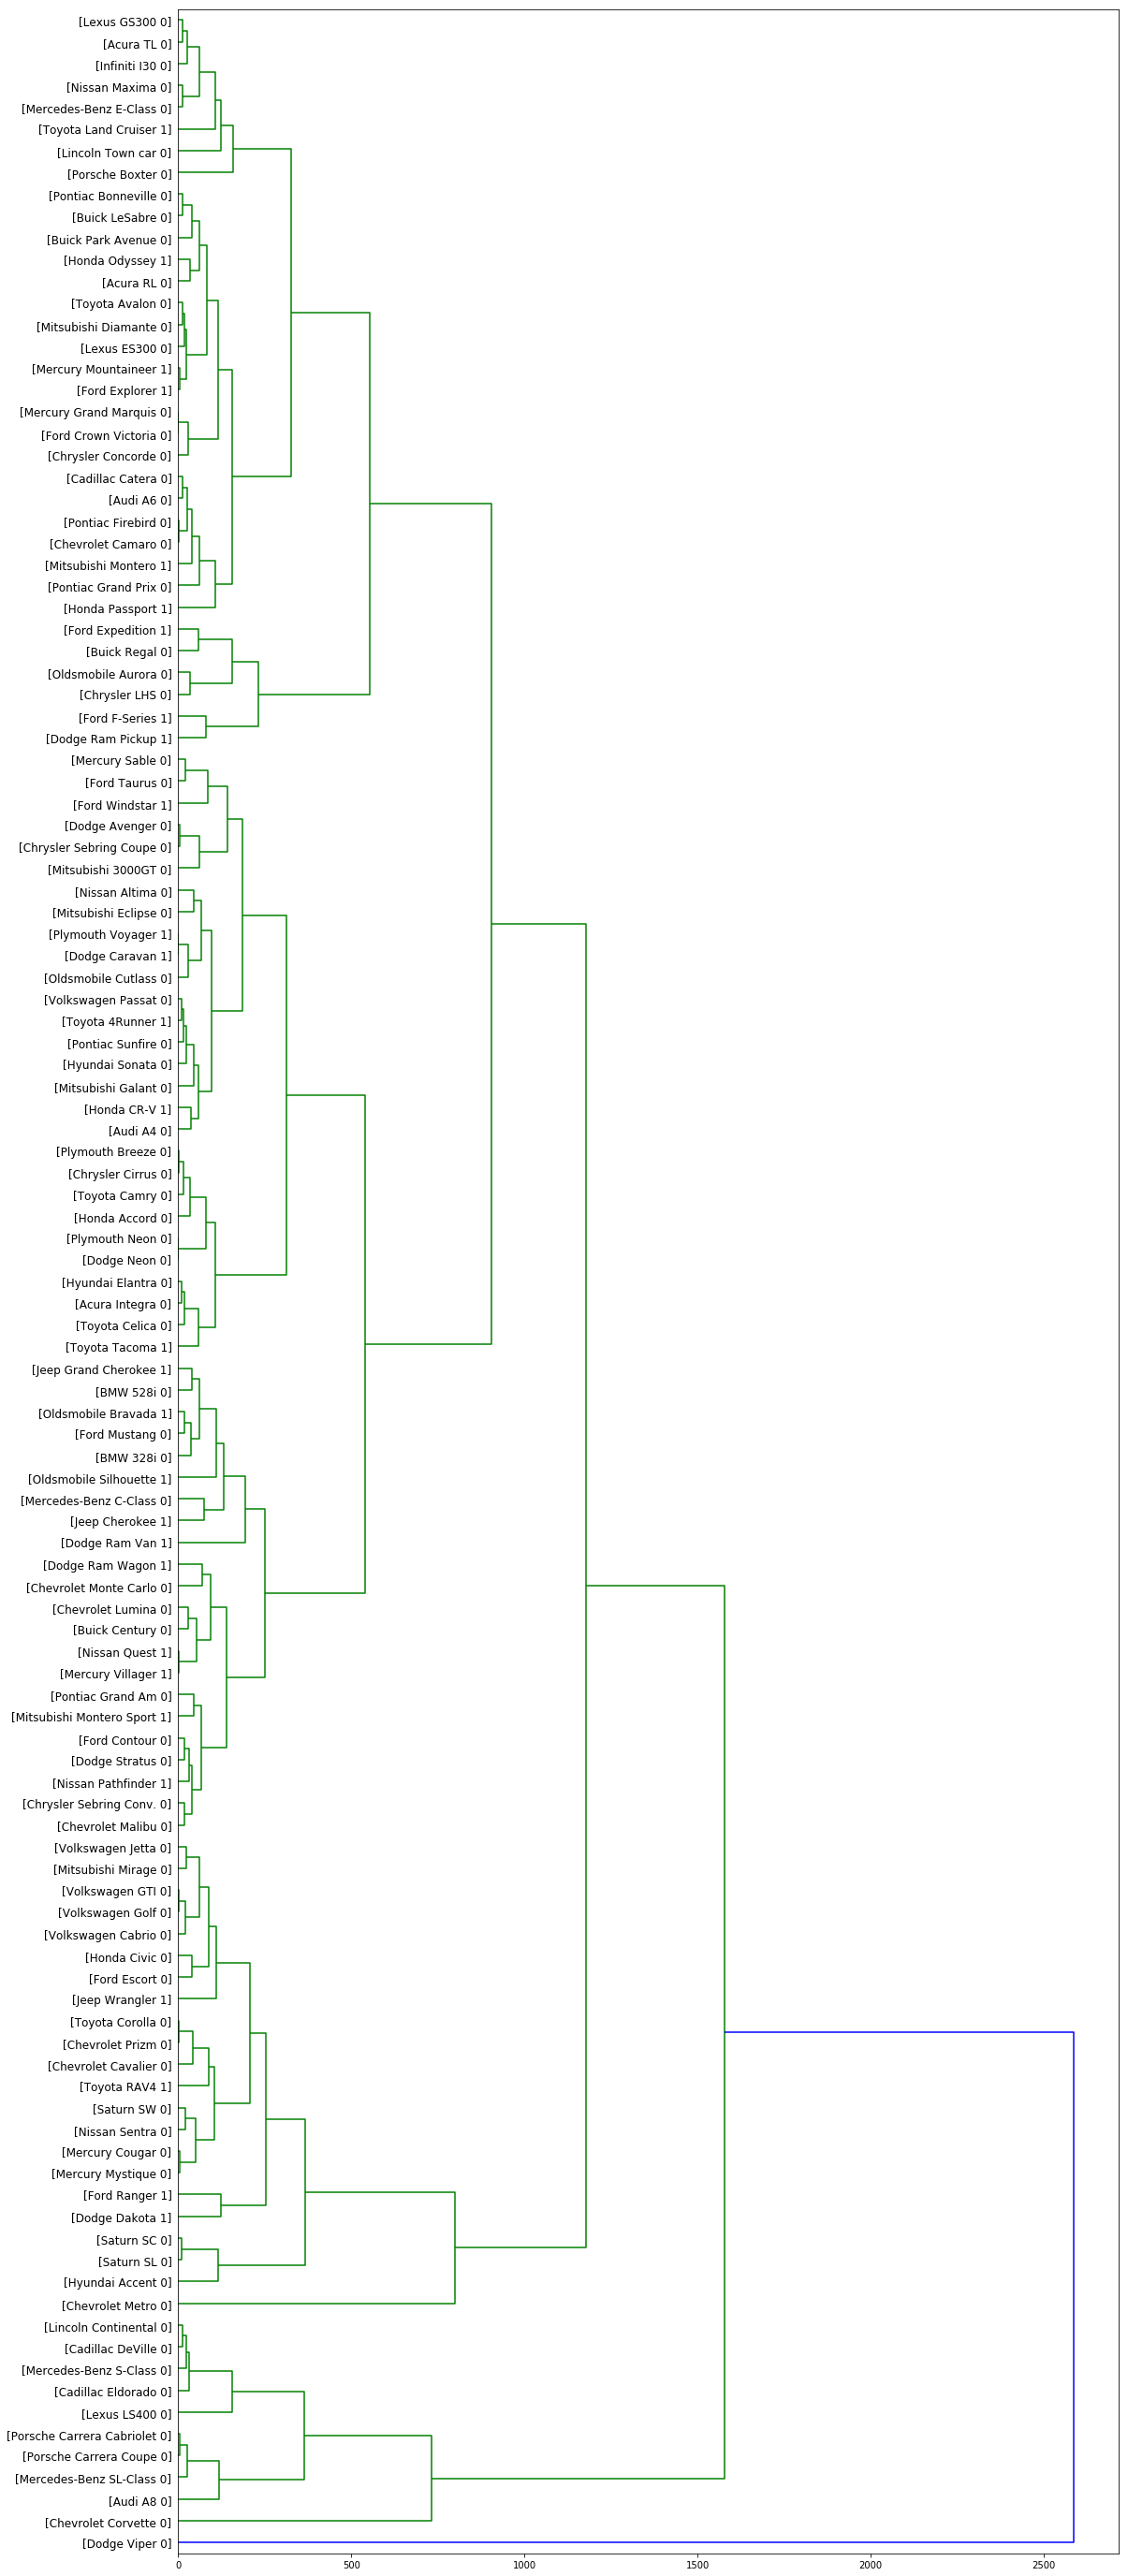

In [146]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], 
                           df['model'][id], 
                           int(float(df['type'][id])))

dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, 
                             leaf_rotation=0, 
                             leaf_font_size=12, 
                             orientation='right')

##### Clustering with SciKit Learn

In [147]:
D = distance_matrix(X, X)
print(D)

[[   0.     87.92   75.8  ...,   16.64   28.08   26.83]
 [  87.92    0.     17.09 ...,   75.6   115.32  114.34]
 [  75.8    17.09    0.   ...,   62.15  103.4   102.08]
 ..., 
 [  16.64   75.6    62.15 ...,    0.     43.35   41.45]
 [  28.08  115.32  103.4  ...,   43.35    0.      3.76]
 [  26.83  114.34  102.08 ...,   41.45    3.76    0.  ]]


In [148]:
agglom = AgglomerativeClustering(n_clusters=6, linkage='complete')

In [149]:
agglom.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=6, pooling_func=<function mean at 0x7f2ad42c3730>)

In [150]:
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,2
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,0


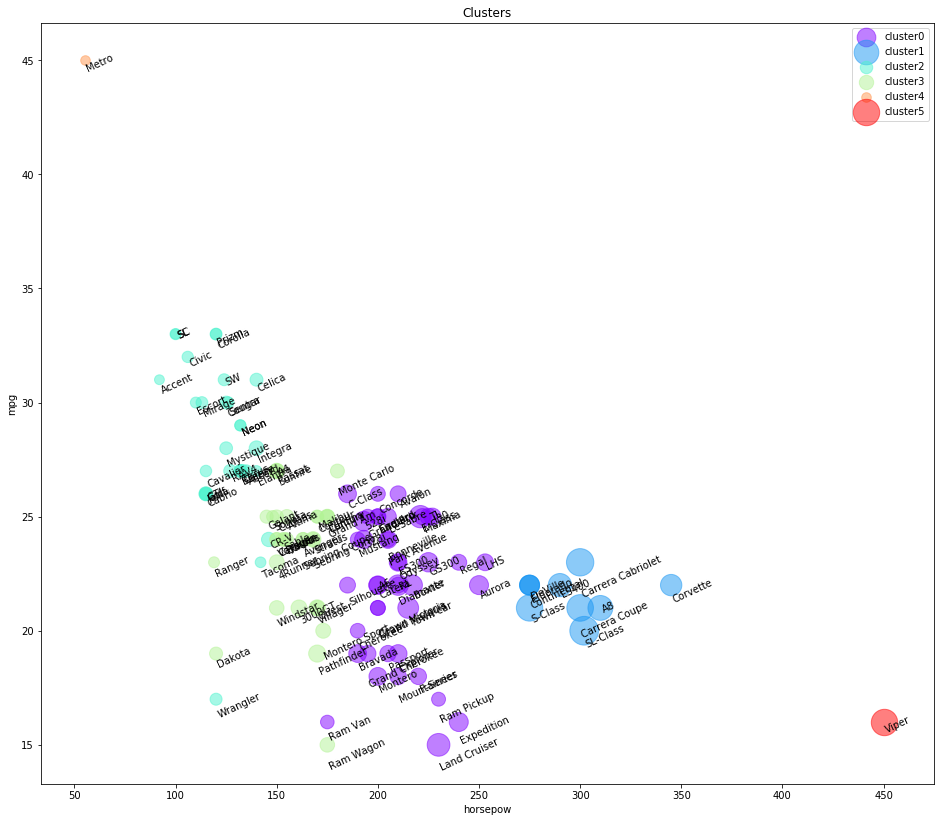

In [151]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0,1,n_clusters))
cluster_labels = list(range(0,n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], 
                     subset.mpg[i],
                     str(subset['model'][i]), 
                     rotation=25) 
            
    plt.scatter(subset.horsepow, subset.mpg, 
                s= subset.price*10, c=color, 
                label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
plt.show()

In [152]:
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     29
          1.0     14
1         0.0     10
2         0.0     26
          1.0      4
3         0.0     21
          1.0     11
4         0.0      1
5         0.0      1
Name: cluster_, dtype: int64

In [153]:
df_mean = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
df_mean

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   210.551724  3.420690  23.648276  30.449310
         1.0   206.428571  4.064286  18.500000  28.727714
1        0.0   294.700000  4.380000  21.600000  57.864000
2        0.0   121.230769  1.934615  29.115385  14.720385
         1.0   133.750000  2.225000  22.750000  15.856500
3        0.0   160.857143  2.680952  24.857143  19.822048
         1.0   154.272727  2.936364  20.909091  21.199364
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   450.000000  8.000000  16.000000  69.725000

Text(0,0.5,'mpg')

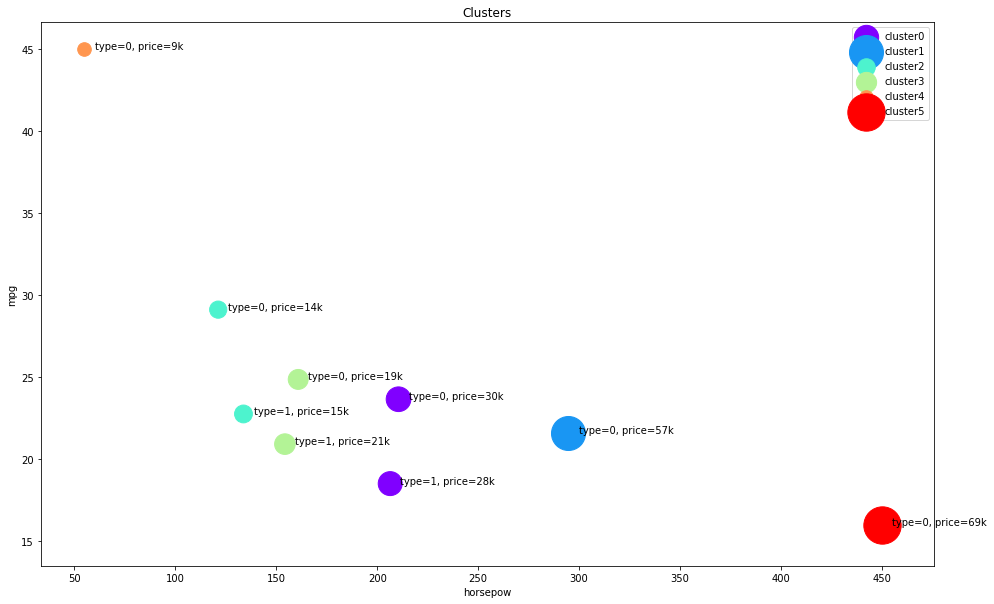

In [154]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = df_mean.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

### DBSCAN

Density Based clstering locates regions of high density and separates outliers while being able to find arbitrarily shaped clusters while ignoring noise

- Density Based Spacial Clustering of Applications with Noise
    - Common clustering algorithm
    - Based on object density
- Radius of neighborhood
- Min number of neighbors

Different types of points

- Core
    - Has M neighbors withn R
- Border
    - Has Core point within R, less than M in R
- Outlier
    - Not Core, or within R of Core

DBSCAN visits each point and identifies its type, and then groups points based on this

#### Lab

##### Import Packages

In [155]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import pandas as pd

##### About the Data

		

######  Environment Canada    
*Monthly Values for July - 2015*

<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 

##### Import the Data

In [156]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv')

In [157]:
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


##### Clean Data

In [158]:
df = df[pd.notnull(df['Tm'])]
df.reset_index(drop=True)
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
5,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


In [159]:
# ! pip install --user git+https://github.com/matplotlib/basemap.git

In [160]:
# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams

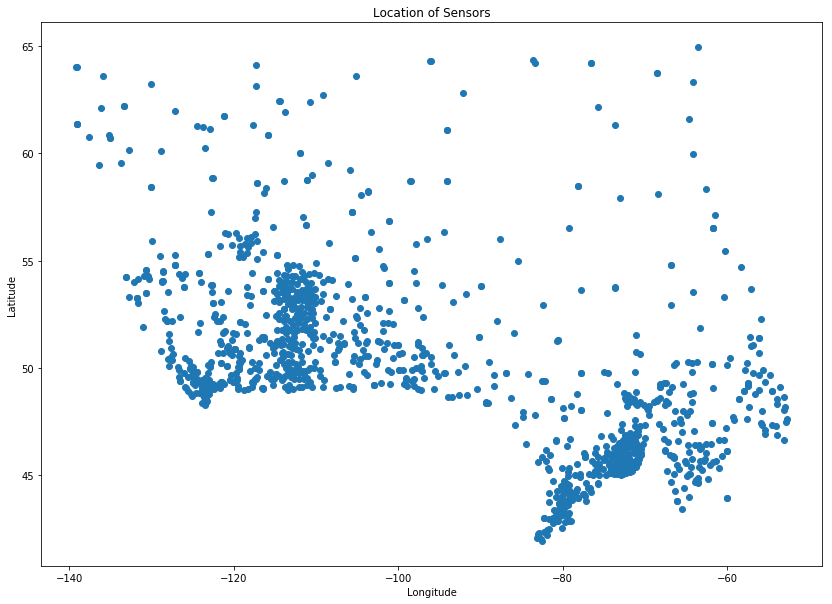

In [161]:
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) &(df['Lat'] < ulat)]

plt.title('Location of Sensors')
plt.scatter(list(df['Long']),list(df['Lat']))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##### Compute DBSCAN

In [162]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

In [163]:
X = np.nan_to_num(df[['Lat','Long']])
X = StandardScaler().fit_transform(X)

X

array([[-0.3 , -1.17],
       [-0.33, -1.19],
       [-0.33, -1.18],
       ..., 
       [ 1.84,  1.47],
       [ 1.01,  1.65],
       [ 0.6 ,  1.28]])

In [164]:
db = DBSCAN(eps=0.15, min_samples=10).fit(X)
db

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [165]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

core_samples_mask

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [166]:
df['Clus_db'] = db.labels_
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,Clus_db
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500,0
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040,0
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055,0
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573,0
5,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710,0


In [167]:
df[['Stn_Name','Tx','Tm','Clus_db']][1000:1500:45]

,Stn_Name,Tx,Tm,Clus_db
1138,HEATH POINT,-1.0,-13.3,-1
1185,LA GRANDE RIVIERE A,-11.6,-28.4,-1
1234,BRIER ISLAND,4.4,-6.3,3
1286,BRANCH,8.0,-3.4,4
1332,GOOSE A,-4.2,-22.0,-1


##### Cluster Visualization

In [168]:
print(df['Clus_db'].max(), df['Clus_db'].min())

5 -1


In [169]:
from sklearn.preprocessing import LabelEncoder

In [170]:
le = LabelEncoder()
colours = ['#D3D3D3','blue','red','green','purple','yellow','deepskyblue']
le.fit(colours)
le.classes_

array(['#D3D3D3', 'blue', 'deepskyblue', 'green', 'purple', 'red', 'yellow'],
      dtype='<U11')

In [171]:
# le.inverse_transform([0,1,2,3,4,5,6])
df['Colours'] = le.inverse_transform(db.labels_ + 1)
df[['Stn_Name','Tx','Tm','Clus_db', 'Colours']][1000:1500:45]

,Stn_Name,Tx,Tm,Clus_db,Colours
1138,HEATH POINT,-1.0,-13.3,-1,#D3D3D3
1185,LA GRANDE RIVIERE A,-11.6,-28.4,-1,#D3D3D3
1234,BRIER ISLAND,4.4,-6.3,3,purple
1286,BRANCH,8.0,-3.4,4,red
1332,GOOSE A,-4.2,-22.0,-1,#D3D3D3


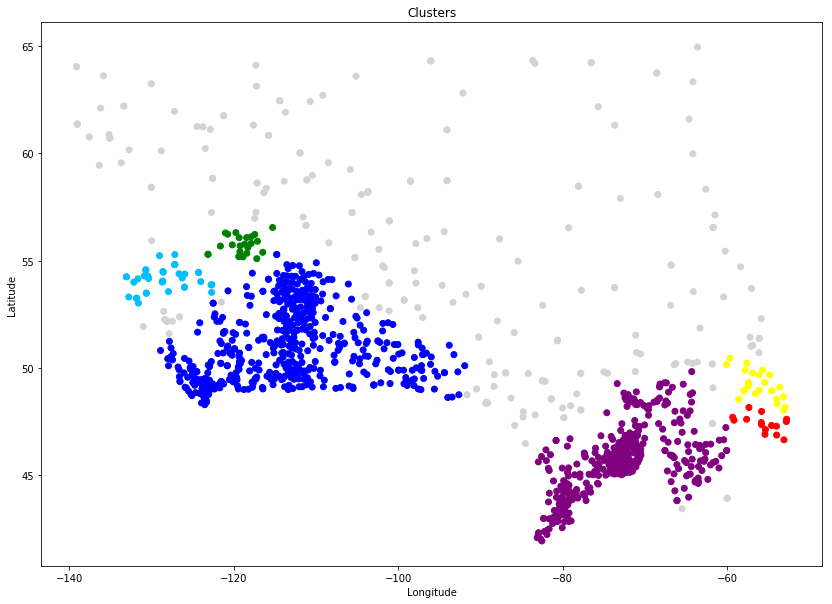

In [172]:
plt.title('Clusters')
plt.scatter(list(df['Long']),
            list(df['Lat']),
            c=list(df['Colours']))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Recommender Systems

Recommender systems try to capture people's behaviour in order to predict what people may like

There are two main types

- Content based
    - Provide more content similar to what that user likes
- Collaborative filtering
    - A user may be interested in what other similar users like
    
There are two types of implementations

- Memory based
    - Uses entire user-item dataset to generate a recommendation
- Model based
    - Develops model of users in an attempt to learn their preferences
    
### Content Based

Content based systems try to recommend content based on a model of the user and similarity of the content that they interact with

#### Lab

##### Download the Data

The dataset being used is a movie dataset from GroupLens

In [173]:
#only run once

# !wget -O moviedataset.zip https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip
# print('unziping ...')
# !unzip -o -j moviedataset.zip 

##### Import Packages

In [174]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

##### Import Data

In [175]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

In [176]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [177]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


##### Preprocessing

In [178]:
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))', 
                                                expand=False)
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)', 
                                               expand=False)

movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())

movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [179]:
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [180]:
genres_df = movies_df.copy()

for index, row in movies_df.iterrows():
    for genre in row['genres']:
        genres_df.at[index, genre] = 1

genres_df = genres_df.fillna(0)
genres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [182]:
ratings_df = ratings_df.drop('timestamp', 1)
ratings_df.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


##### User Interests

In [183]:
user_movies = pd.DataFrame([
                            {'title':'Breakfast Club, The', 'rating':5},
                            {'title':'Toy Story', 'rating':3.5},
                            {'title':'Jumanji', 'rating':2},
                            {'title':"Pulp Fiction", 'rating':5},
                            {'title':'Akira', 'rating':4.5}
                           ])
user_movies

,rating,title
0,5.0,"Breakfast Club, The"
1,3.5,Toy Story
2,2.0,Jumanji
3,5.0,Pulp Fiction
4,4.5,Akira


In [184]:
movie_ids = genres_df[genres_df['title'].isin(user_movies['title'].tolist())]
user_movies = pd.merge(movie_ids, user_movies)
user_genres = user_movies.drop('genres', 1).drop('year',1)
user_genres

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),rating
0,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
1,2,Jumanji,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,296,Pulp Fiction,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1274,Akira,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
4,1968,"Breakfast Club, The",0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


Since we only need the genres

In [185]:
user_genres.drop('title', 1, inplace=True)
user_genres.drop('movieId', 1, inplace=True)
user_genres.drop('rating', 1, inplace=True)
user_genres

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


And next we need to multiply this with the ratings column

In [186]:
user_profile = user_genres.transpose().dot(user_movies['rating'])
user_profile

Adventure             10.0
Animation              8.0
Children               5.5
Comedy                13.5
Fantasy                5.5
Romance                0.0
Drama                 10.0
Action                 4.5
Crime                  5.0
Thriller               5.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 4.5
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

We can then compare this to the table of all our movies, and build a recommendation based on that

In [187]:
all_genres = genres_df.set_index(genres_df['movieId'])
all_genres.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,,
1,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
all_genres.drop(['movieId','title','genres','year'], 1, inplace=True)
all_genres.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
user_recommendation = all_genres.dot(user_profile)/user_profile.sum()
user_recommendation.head()

movieId
1    0.594406
2    0.293706
3    0.188811
4    0.328671
5    0.188811
dtype: float64

In [190]:
user_recommendation.sort_values(ascending=False, inplace=True)
user_recommendation.head(10)

movieId
5018      0.748252
26093     0.734266
27344     0.720280
148775    0.685315
6902      0.678322
117646    0.678322
64645     0.671329
81132     0.671329
122787    0.671329
2987      0.664336
dtype: float64

##### Top Recommendations for User

In [191]:
movies_df.loc[movies_df['movieId'].isin(user_recommendation.head().keys())]

,movieId,title,genres,year
4923,5018,Motorama,"[Adventure, Comedy, Crime, Drama, Fantasy, Mys...",1991
6793,6902,Interstate 60,"[Adventure, Comedy, Drama, Fantasy, Mystery, S...",2002
8605,26093,"Wonderful World of the Brothers Grimm, The","[Adventure, Animation, Children, Comedy, Drama...",1962
9296,27344,Revolutionary Girl Utena: Adolescence of Utena...,"[Action, Adventure, Animation, Comedy, Drama, ...",1999
33509,148775,Wizards of Waverly Place: The Movie,"[Adventure, Children, Comedy, Drama, Fantasy, ...",2009


### Collaborative Filtering

Collaborative filtering works by recommending content based on other similar users/items

There are two types

- User
    - Based on user's similar neighborhood
- Item 
    - Based on similarity of item recommendations   

#### Lab

Note that this uses the same movie data as before and uses the Pearson Correlation Coefficient to identify users who rate movies similarly based on the ratings table and can be found in `5-2-Collaborative-Filtering`